<h3><b>Basics of text embedding</h3>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h2>One Hot encoding</h2>

In [2]:
from sklearn.preprocessing import LabelBinarizer

corpus = ['apple', 'banana', 'orange', 'apple']
lb = LabelBinarizer()
one_hot = lb.fit_transform(corpus)

print("Vocabulary:", lb.classes_)
print("One-Hot Encoding:\n", one_hot)

Vocabulary: ['apple' 'banana' 'orange']
One-Hot Encoding:
 [[1 0 0]
 [0 1 0]
 [0 0 1]
 [1 0 0]]


<h2>Bag of Words(Count Vectorizer)</h2>

In [3]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = [
    'apple and banana',
    'banana and orange',
    'apple apple banana'
]

vectorizer = CountVectorizer()
bow = vectorizer.fit_transform(corpus)

print("Vocabulary:", vectorizer.get_feature_names_out())
print("BoW Matrix:\n", bow.toarray())

Vocabulary: ['and' 'apple' 'banana' 'orange']
BoW Matrix:
 [[1 1 1 0]
 [1 0 1 1]
 [0 2 1 0]]


<h2>Tf-Idf Vectorizer</h2>

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()
tfidf = tfidf_vectorizer.fit_transform(corpus)

print("Vocabulary:", tfidf_vectorizer.get_feature_names_out())
print("TF-IDF Matrix:\n", tfidf.toarray())

Vocabulary: ['and' 'apple' 'banana' 'orange']
TF-IDF Matrix:
 [[0.61980538 0.61980538 0.48133417 0.        ]
 [0.54783215 0.         0.42544054 0.72033345]
 [0.         0.93219169 0.361965   0.        ]]


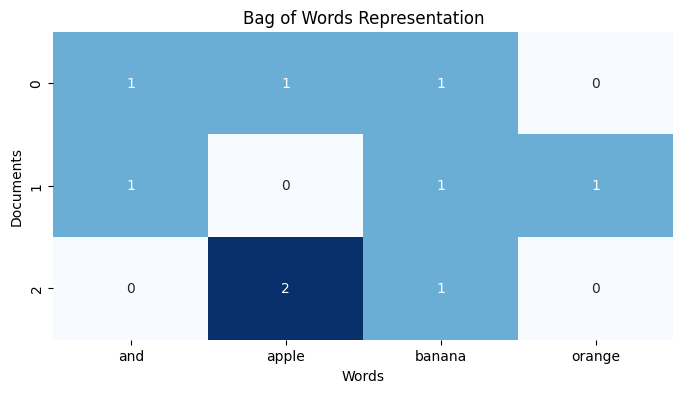

In [5]:
bow_df = pd.DataFrame(bow.toarray(), columns=vectorizer.get_feature_names_out())
plt.figure(figsize=(8, 4))
sns.heatmap(bow_df, annot=True, cmap="Blues", cbar=False)
plt.title("Bag of Words Representation")
plt.xlabel("Words")
plt.ylabel("Documents")
plt.show()

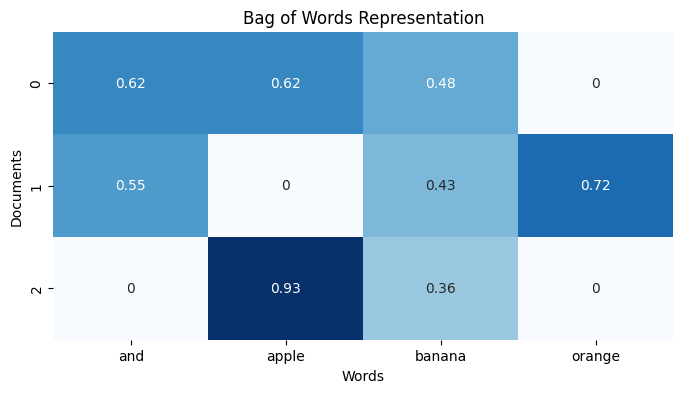

In [6]:
tfidf_df = pd.DataFrame(tfidf.toarray(), columns=tfidf_vectorizer.get_feature_names_out())
plt.figure(figsize=(8, 4))
sns.heatmap(tfidf_df, annot=True, cmap="Blues", cbar=False)
plt.title("Bag of Words Representation")
plt.xlabel("Words")
plt.ylabel("Documents")
plt.show()

<h2>Neural methods</h2>

In [7]:
!pip install gensim

In [67]:
!pip install --upgrade numpy
!pip install --upgrade gensim

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
  A

In [8]:
from gensim.models import Word2Vec

# Sample corpus (list of tokenized sentences)
corpus = [
    ['apple', 'is', 'a', 'fruit'],
    ['banana', 'is', 'yellow'],
    ['orange', 'and', 'apple', 'are', 'fruits'],
    ['i', 'love', 'banana', 'and', 'orange']
]

# Train Word2Vec Model - CBOW (default)
model_cbow = Word2Vec(sentences=corpus, vector_size=50, window=2, min_count=1, sg=0)

# Train Word2Vec Model - Skip-Gram
model_skipgram = Word2Vec(sentences=corpus, vector_size=50, window=2, min_count=1, sg=1)

# Example: Get vector for word 'apple'
print("CBOW vector for 'apple':\n", model_cbow.wv['apple'])
print("\nSkip-Gram vector for 'apple':\n", model_skipgram.wv['apple'])

# Most similar words to 'apple'
print("\nCBOW similar to 'apple':", model_cbow.wv.most_similar('apple'))
print("Skip-Gram similar to 'apple':", model_skipgram.wv.most_similar('apple'))


CBOW vector for 'apple':
 [ 0.00018913  0.00615464 -0.01362529 -0.00275093  0.01533716  0.01469282
 -0.00734659  0.0052854  -0.01663426  0.01241097 -0.00927464 -0.00632821
  0.01862271  0.00174677  0.01498141 -0.01214813  0.01032101  0.01984565
 -0.01691478 -0.01027138 -0.01412967 -0.0097253  -0.00755713 -0.0170724
  0.01591121 -0.00968788  0.01684723  0.01052514 -0.01310005  0.00791574
  0.0109403  -0.01485307 -0.01481144 -0.00495046 -0.01725145 -0.00316314
 -0.00080687  0.00659937  0.00288376 -0.00176284 -0.01118812  0.00346073
 -0.00179474  0.01358738  0.00794718  0.00905894  0.00286861 -0.00539971
 -0.00873363 -0.00206415]

Skip-Gram vector for 'apple':
 [ 0.00018913  0.00615464 -0.01362529 -0.00275093  0.01533716  0.01469282
 -0.00734659  0.0052854  -0.01663426  0.01241097 -0.00927464 -0.00632821
  0.01862271  0.00174677  0.01498141 -0.01214813  0.01032101  0.01984565
 -0.01691478 -0.01027138 -0.01412967 -0.0097253  -0.00755713 -0.0170724
  0.01591121 -0.00968788  0.01684723  0.01

<h3><b>RNN</h3>

<h2>text classification</h2>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split,TensorDataset
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import re

In [10]:
data = pd.read_csv("/content/drive/MyDrive/DLL/Restaurant_Reviews.tsv",delimiter='\t')
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [11]:
def preprocess(text):
  text = text.lower()
  text = re.sub(r'[^a-z0-9\s]','',text)
  return text

In [12]:
texts = data['Review'].apply(preprocess).tolist()
labels = data['Liked'].tolist()

In [13]:
train_texts, temp_texts, train_labels, temp_labels = train_test_split(texts, labels, test_size=0.3)
val_texts, test_texts, val_labels, test_labels = train_test_split(temp_texts, temp_labels, test_size=0.5)

In [14]:
word_to_idx = {"<PAD>": 0, "<UNK>": 1}
for sent in train_texts:
    for word in sent.split():
        if word not in word_to_idx:
            word_to_idx[word] = len(word_to_idx)

max_len = max(len(sent.split()) for sent in train_texts)

def encode_sentence(sent):
    encoded = [word_to_idx.get(word, word_to_idx["<UNK>"]) for word in sent.split()[:max_len]]
    encoded += [0] * (max_len - len(encoded))
    return encoded

In [15]:
X_train = torch.tensor([encode_sentence(sent) for sent in train_texts], dtype=torch.long)
X_val = torch.tensor([encode_sentence(sent) for sent in val_texts], dtype=torch.long)
X_test = torch.tensor([encode_sentence(sent) for sent in test_texts], dtype=torch.long)
"""
le = LabelEncoder()
le.fit(train_labels+test_labels+val_labels)

y_train = torch.tensor(le.transform(train_labels), dtype=torch.long)
y_val = torch.tensor(le.transform(val_labels), dtype=torch.long)
y_test = torch.tensor(le.transform(test_labels), dtype=torch.long)
"""

y_train = torch.tensor(train_labels, dtype=torch.float32)
y_val = torch.tensor(val_labels, dtype=torch.float32)
y_test = torch.tensor(test_labels, dtype=torch.float32)

train_dataset = TensorDataset(X_train, y_train)
val_dataset = TensorDataset(X_val, y_val)
test_dataset = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

In [16]:
class RNNClassifier(nn.Module):
    def __init__(self, vocab_size, embed_dim, hidden_dim):
        super(RNNClassifier, self).__init__()
        self.embedding = nn.Embedding(num_embeddings=vocab_size,embedding_dim=embed_dim, padding_idx=0)
        self.rnn = nn.RNN(input_size=embed_dim,hidden_size=hidden_dim,num_layers=2, batch_first=True)
        #self.lstm = nn.LSTM(input_size=embed_dim,hidden_size=hidden_dim,num_layers=2, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)
        self.act = nn.Sigmoid()

    def forward(self, x):
        x = self.embedding(x)
        _, hidden = self.rnn(x)
        #_, (hidden, _) = self.lstm(x)
        layer1 = self.fc(hidden[-1])
        return self.act(layer1)

In [17]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RNNClassifier(len(word_to_idx), embed_dim=64, hidden_dim=64).to(device)

In [18]:
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [19]:
def train(model, loader):
    model.train()
    total_loss = 0
    for x, y in loader:
        x, y = x.to(device), y.to(device)
        optimizer.zero_grad()
        outputs = model(x).squeeze()
        loss = criterion(outputs,y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

In [20]:
def evaluate(model, loader):
    predicted = []
    actual = []
    model.eval()
    correct = total = 0
    with torch.no_grad():
        for x, y in loader:
            x, y = x.to(device), y.to(device)
            outputs = model(x).squeeze()
            preds = (outputs>=0.5).float()
            correct += (preds == y).sum().item()
            total += y.size(0)
            predicted.extend(preds.numpy())
            actual.extend(y.float().numpy())
    return predicted,actual,correct / total *100

In [21]:
for epoch in range(100):
    train_loss = train(model, train_loader)
    a,b,val_acc = evaluate(model, val_loader)
    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Val Accuracy = {val_acc:.4f}")

y_pred,y_act,test_acc = evaluate(model, test_loader)
print(f"\nTest Accuracy: {test_acc:.4f}")

Epoch 1: Train Loss = 0.6952, Val Accuracy = 50.0000
Epoch 2: Train Loss = 0.6921, Val Accuracy = 47.3333
Epoch 3: Train Loss = 0.6886, Val Accuracy = 50.0000
Epoch 4: Train Loss = 0.6756, Val Accuracy = 48.6667
Epoch 5: Train Loss = 0.6761, Val Accuracy = 42.0000
Epoch 6: Train Loss = 0.6406, Val Accuracy = 44.6667
Epoch 7: Train Loss = 0.6304, Val Accuracy = 61.3333
Epoch 8: Train Loss = 0.6287, Val Accuracy = 48.0000
Epoch 9: Train Loss = 0.5945, Val Accuracy = 50.0000
Epoch 10: Train Loss = 0.5604, Val Accuracy = 46.0000
Epoch 11: Train Loss = 0.5216, Val Accuracy = 48.6667
Epoch 12: Train Loss = 0.4773, Val Accuracy = 48.6667
Epoch 13: Train Loss = 0.4775, Val Accuracy = 46.6667
Epoch 14: Train Loss = 0.4771, Val Accuracy = 50.6667
Epoch 15: Train Loss = 0.5686, Val Accuracy = 56.6667
Epoch 16: Train Loss = 0.7059, Val Accuracy = 56.6667
Epoch 17: Train Loss = 0.6582, Val Accuracy = 47.3333
Epoch 18: Train Loss = 0.6386, Val Accuracy = 54.6667
Epoch 19: Train Loss = 0.5900, Val Ac

Text or next word prediction

In [4]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader,TensorDataset
import numpy as np

data = pd.read_csv("/content/drive/MyDrive/DLL/Restaurant_Reviews.tsv",delimiter='\t')

In [5]:
def preprocess(text):
  text = text.lower()
  text = re.sub(r'[^a-z0-9\s]','',text)
  return text

corpus = data['Review'].apply(preprocess).tolist()

In [6]:
train_sentences, temp_sentences = train_test_split(corpus, test_size=0.3, random_state=42)
val_sentences, test_sentences = train_test_split(temp_sentences, test_size=0.5, random_state=42)

In [7]:
word_to_idx = {"<PAD>": 0, "<UNK>": 1}
for sentence in train_sentences:
    for word in sentence.split():
        if word not in word_to_idx:
            word_to_idx[word] = len(word_to_idx)

idx_to_word = {idx: word for word, idx in word_to_idx.items()}
vocab_size = len(word_to_idx)
print(f"Vocab size: {vocab_size}")

Vocab size: 1712


In [8]:
sequence_length = 2  # how many words used to predict the next

def make_sequences(sentences, seq_len):
    sequences = []
    for sentence in sentences:
        words = sentence.split()
        if len(words) < seq_len + 1:
            continue
        for i in range(len(words) - seq_len):
            input_seq = words[i:i+seq_len]
            target = words[i+seq_len]
            sequences.append((input_seq, target))
    return sequences

train_seq = make_sequences(train_sentences, sequence_length)
val_seq = make_sequences(val_sentences, sequence_length)
test_seq = make_sequences(test_sentences, sequence_length)

In [9]:
def encode(seq):
    return [word_to_idx.get(word, word_to_idx["<UNK>"]) for word in seq]

def prepare_dataset(sequences):
    X = [encode(seq) for seq, _ in sequences]
    y = [word_to_idx.get(target, word_to_idx["<UNK>"]) for _, target in sequences]
    X = torch.tensor(X, dtype=torch.long)
    y = torch.tensor(y, dtype=torch.long)
    return TensorDataset(X, y)

train_dataset = prepare_dataset(train_seq)
val_dataset = prepare_dataset(val_seq)
test_dataset = prepare_dataset(test_seq)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

In [10]:
class NextWordRNN(nn.Module):
    def __init__(self, vocab_size, embed_dim=64, hidden_dim=128):
        super(NextWordRNN, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim, padding_idx=0)
        #self.rnn = nn.RNN(embed_dim, hidden_dim, batch_first=True,num_layers=2)
        self.lstm = nn.LSTM(embed_dim, hidden_dim, batch_first=True,num_layers=2)
        self.fc = nn.Linear(hidden_dim, vocab_size)  # Predict next word from hidden state

    def forward(self, x):
        x = self.embedding(x)              # (batch_size, seq_len, embed_dim)
        #_, h_n = self.rnn(x)               # h_n: (num_layers * num_directions, batch, hidden_size)
        _,(h_n,_) = self.lstm(x)
        logits = self.fc(h_n[-1])          # Use final hidden state
        return logits                      # (batch, vocab_size)

In [11]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = NextWordRNN(vocab_size).to(device)

optimizer = torch.optim.Adam(model.parameters(), lr=0.005)
criterion = nn.CrossEntropyLoss()

In [12]:
def train(model, loader):
    model.train()
    total_loss = 0
    for X_batch, y_batch in loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        outputs = model(X_batch)                     # (batch, vocab_size)
        loss = criterion(outputs, y_batch)           # CrossEntropy expects raw logits
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

In [13]:
def evaluate(model, loader):
    model.eval()
    correct = total = 0
    predicted = []
    actual = []
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            outputs = model(X_batch)
            preds = outputs.argmax(dim=1)           # Choose the word with highest logit
            correct += (preds == y_batch).sum().item()
            total += y_batch.size(0)
            predicted.extend(preds.float().numpy())
            actual.extend(y_batch.float().numpy())
    return predicted,actual,correct / total * 100

In [14]:
for epoch in range(200):
    train_loss = train(model, train_loader)
    a,b,val_acc = evaluate(model, val_loader)
    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Val Accuracy = {val_acc:.2f}%")

y_pred,y_act,test_acc = evaluate(model, test_loader)
print(f"\nTest Accuracy: {test_acc:.2f}%")

Epoch 1: Train Loss = 6.4829, Val Accuracy = 8.11%
Epoch 2: Train Loss = 5.6867, Val Accuracy = 10.52%
Epoch 3: Train Loss = 4.9593, Val Accuracy = 10.05%
Epoch 4: Train Loss = 4.0460, Val Accuracy = 9.82%
Epoch 5: Train Loss = 3.0866, Val Accuracy = 10.13%
Epoch 6: Train Loss = 2.2319, Val Accuracy = 9.35%
Epoch 7: Train Loss = 1.6670, Val Accuracy = 9.28%
Epoch 8: Train Loss = 1.3390, Val Accuracy = 8.73%
Epoch 9: Train Loss = 1.1506, Val Accuracy = 8.18%
Epoch 10: Train Loss = 1.0442, Val Accuracy = 8.73%
Epoch 11: Train Loss = 0.9774, Val Accuracy = 8.65%
Epoch 12: Train Loss = 0.9396, Val Accuracy = 8.89%
Epoch 13: Train Loss = 0.9125, Val Accuracy = 8.96%
Epoch 14: Train Loss = 0.8855, Val Accuracy = 9.74%
Epoch 15: Train Loss = 0.8718, Val Accuracy = 8.65%
Epoch 16: Train Loss = 0.8551, Val Accuracy = 9.43%
Epoch 17: Train Loss = 0.8417, Val Accuracy = 8.50%
Epoch 18: Train Loss = 0.8325, Val Accuracy = 8.34%
Epoch 19: Train Loss = 0.8229, Val Accuracy = 8.42%
Epoch 20: Train Lo

In [15]:
def predict_next_word(model, input_sentence, word_to_idx, idx_to_word, sequence_length, device):
    model.eval()
    words = input_sentence.lower().split()
    if len(words) < sequence_length:
        words = ["<PAD>"] * (sequence_length - len(words)) + words
    else:
        words = words[-sequence_length:]

    encoded = [word_to_idx.get(word, word_to_idx["<UNK>"]) for word in words]
    input_tensor = torch.tensor([encoded], dtype=torch.long).to(device)

    with torch.no_grad():
        logits = model(input_tensor)
        pred_idx = torch.argmax(logits, dim=1).item()

    return idx_to_word.get(pred_idx, "<UNK>")


In [16]:
input_sentence = "i love this"
next_word = predict_next_word(model, input_sentence, word_to_idx, idx_to_word, sequence_length, device)
print(f"Next word prediction: {next_word}")

Next word prediction: place


Time Series Data

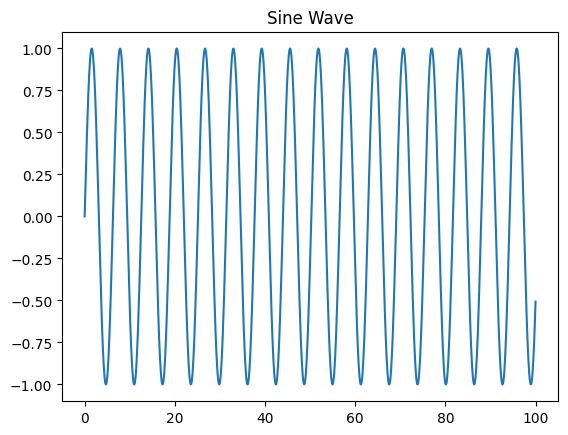

In [38]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
import matplotlib.pyplot as plt

# Create sine wave data
x = np.linspace(0, 100, 1000)
y = np.sin(x)

plt.plot(x, y)
plt.title("Sine Wave")
plt.show()

In [39]:
sequence_length = 2

def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)


In [40]:
X, y = create_sequences(y, sequence_length)
print(X[0:5],y[0:5])
train_size = int(0.7 * len(X))
val_size = int(0.15 * len(X))
test_size = len(X) - train_size - val_size

X_train, X_val, X_test = X[:train_size], X[train_size:train_size+val_size], X[train_size+val_size:]
y_train, y_val, y_test = y[:train_size], y[train_size:train_size+val_size], y[train_size+val_size:]
print(X_train.shape)
X_train = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1)
X_val = torch.tensor(X_val, dtype=torch.float32).unsqueeze(-1)
y_val = torch.tensor(y_val, dtype=torch.float32).unsqueeze(-1)
X_test = torch.tensor(X_test, dtype=torch.float32).unsqueeze(-1)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(-1)
print(X_train.shape)
train_loader = DataLoader(TensorDataset(X_train, y_train), batch_size=32)
val_loader = DataLoader(TensorDataset(X_val, y_val), batch_size=32)
test_loader = DataLoader(TensorDataset(X_test, y_test), batch_size=32)


[[0.         0.09993302]
 [0.09993302 0.19886554]
 [0.19886554 0.29580708]
 [0.29580708 0.3897871 ]
 [0.3897871  0.47986471]] [0.19886554 0.29580708 0.3897871  0.47986471 0.56513807]
(698, 2)
torch.Size([698, 2, 1])


In [44]:
class RNNTimeSeries(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=64, num_layers=2):
        super(RNNTimeSeries, self).__init__()
        #self.rnn = nn.RNN(input_dim, hidden_dim, num_layers=num_layers, batch_first=True)
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers=num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out[:, -1, :])  # only final time step output

In [45]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = RNNTimeSeries().to(device)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [46]:
def train(model, loader):
    model.train()
    total_loss = 0
    for X_batch, y_batch in loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    return total_loss / len(loader)

In [47]:
def evaluate(model, loader):
    model.eval()
    total_loss = 0
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch, y_batch = X_batch.to(device), y_batch.to(device)
            output = model(X_batch)
            loss = criterion(output, y_batch)
            total_loss += loss.item()
    return total_loss / len(loader)

In [48]:
for epoch in range(50):
    train_loss = train(model, train_loader)
    val_loss = evaluate(model, val_loader)
    print(f"Epoch {epoch+1}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")

Epoch 1: Train Loss = 0.2125, Val Loss = 0.0482
Epoch 2: Train Loss = 0.0266, Val Loss = 0.0182
Epoch 3: Train Loss = 0.0165, Val Loss = 0.0150
Epoch 4: Train Loss = 0.0149, Val Loss = 0.0141
Epoch 5: Train Loss = 0.0142, Val Loss = 0.0129
Epoch 6: Train Loss = 0.0131, Val Loss = 0.0116
Epoch 7: Train Loss = 0.0117, Val Loss = 0.0099
Epoch 8: Train Loss = 0.0097, Val Loss = 0.0075
Epoch 9: Train Loss = 0.0067, Val Loss = 0.0038
Epoch 10: Train Loss = 0.0086, Val Loss = 0.0065
Epoch 11: Train Loss = 0.0029, Val Loss = 0.0012
Epoch 12: Train Loss = 0.0068, Val Loss = 0.0053
Epoch 13: Train Loss = 0.0033, Val Loss = 0.0014
Epoch 14: Train Loss = 0.0017, Val Loss = 0.0004
Epoch 15: Train Loss = 0.0004, Val Loss = 0.0002
Epoch 16: Train Loss = 0.0008, Val Loss = 0.0004
Epoch 17: Train Loss = 0.0006, Val Loss = 0.0001
Epoch 18: Train Loss = 0.0036, Val Loss = 0.0023
Epoch 19: Train Loss = 0.0009, Val Loss = 0.0005
Epoch 20: Train Loss = 0.0004, Val Loss = 0.0002
Epoch 21: Train Loss = 0.0002

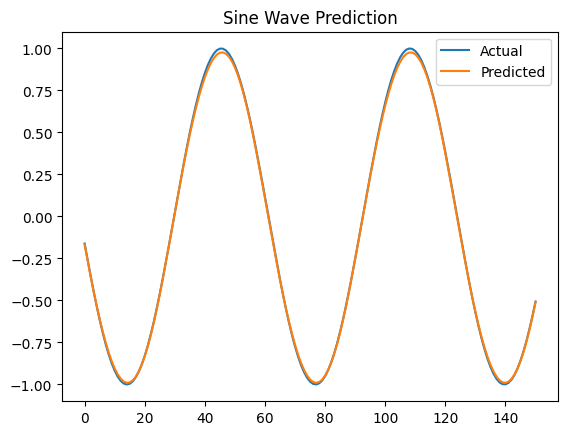

In [49]:
model.eval()
with torch.no_grad():
    y_pred = model(X_test.to(device)).cpu().numpy()
    y_true = y_test.numpy()

plt.plot(y_true, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title("Sine Wave Prediction")
plt.show()